# Question/Problem Statement

### 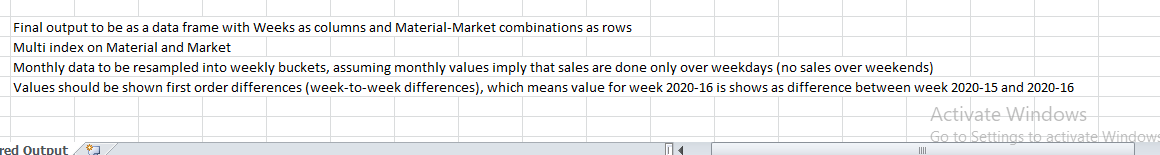

### Output Format

#### 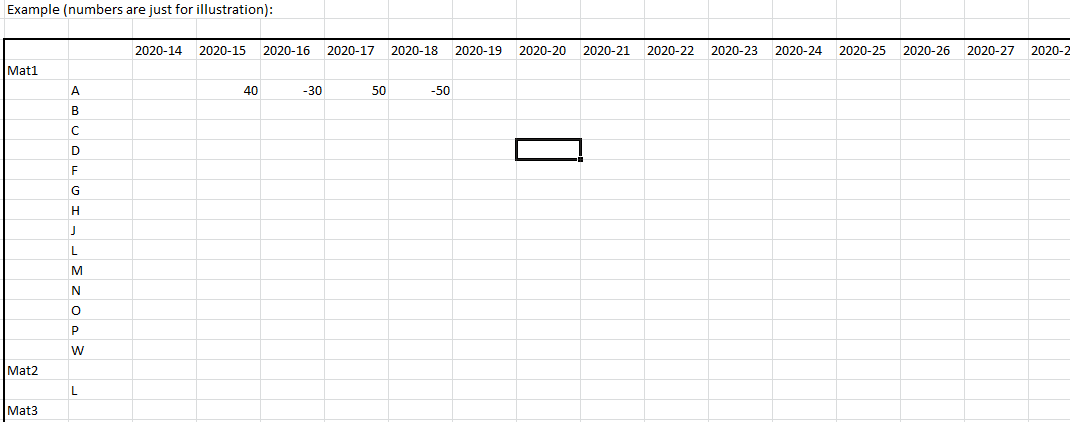

#### Sample Data

### 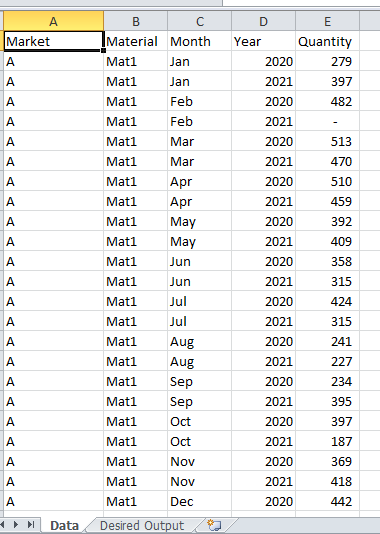

## Solution

In [46]:
import pandas as pd

In [47]:
df=pd.read_excel(r'C:\Users\320062873\Rahul\MDT\Test_DataScience.xlsx',sheet_name='Data')

In [48]:
df.head()

,Market,Material,Month,Year,Quantity
0,A,Mat1,Jan,2020,279
1,A,Mat1,Jan,2021,397
2,A,Mat1,Feb,2020,482
3,A,Mat1,Feb,2021,0
4,A,Mat1,Mar,2020,513


In [49]:
# create new column by combining month and year so that i can add date in order to find weekly data.
df['date']=df['Year'].astype(str)+'-'+df['Month'].astype(str)

In [50]:
df['date1']=pd.to_datetime(df['date'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Market    456 non-null    object        
 1   Material  456 non-null    object        
 2   Month     456 non-null    object        
 3   Year      456 non-null    int64         
 4   Quantity  456 non-null    int64         
 5   date      456 non-null    object        
 6   date1     456 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 25.1+ KB


In [52]:
df1=df.reset_index(drop=True).set_index(['date1', 'Material','Market'])

In [53]:
df1.columns

Index(['Month', 'Year', 'Quantity', 'date'], dtype='object')

In [69]:
df2.head(2)

,,,Quantity
date1,Material,Market,
2020-01-01,Mat1,A,279
2021-01-01,Mat1,A,397


In [54]:
df2=df1[['Quantity']]

In [57]:
df2.head()

,,,Quantity
date1,Material,Market,
2020-01-01,Mat1,A,279
2021-01-01,Mat1,A,397
2020-02-01,Mat1,A,482
2021-02-01,Mat1,A,0
2020-03-01,Mat1,A,513


In [56]:
#df[(df.date=='2020-01-01') & (df.Material=='Mat1') & (df.Market=='B')].head()

In [58]:
#In order to resample Monthly data into weekly buckets, assuming monthly values imply that sales 
#are done only over weekdays (no sales over weekends)

df3=df2.groupby([pd.Grouper(level='Material'), 
            pd.Grouper(level='Market'), 
            pd.Grouper(level='date1', freq='W')]
          ).sum()

In [59]:
df3.head()

Quantity
Material Market date1               
Mat1     A      2020-01-05       279
                2020-02-02       482
                2020-03-01       513
                2020-04-05       510
                2020-05-03       392

In [60]:
df4=df3.reset_index().set_index(['Material','Market'])

In [61]:
df4['Year-Week']=df4['date1'].dt.strftime('%Y-%V')
# df4['Year']=df4['date1'].dt.year

In [62]:
df4.columns

Index(['date1', 'Quantity', 'Year-Week'], dtype='object')

In [63]:
df4=df4[['Quantity', 'Year-Week']]

In [64]:
df5=df4.pivot_table(index=['Material','Market'],columns='Year-Week',values='Quantity')

In [66]:
df5

Year-Week        2020-01  2020-05  2020-09  2020-14  2020-18  2020-23  \
Material Market                                                         
Mat1     A           279      482      513      510      392      358   
         B            25        0        4        0        0       12   
         C             2      100       49       43       47       49   
         D          1371     1695     1000      500      500      500   
         F             8       44       40       64       54       56   
         G             0        0       17       20        5        4   
         H            20       74       87       82       84       85   
         J             0        0        7        6        3        5   
         L           227      164      568      514      546      529   
         M             0       41      144       65       65       87   
         N          1021     1915      646      714      752      670   
         O             0        0        0        0        0        0   
         P             0        0        0        0        0        0   
         W             0        0        0        0       10       20   
Mat2     L           190      103        0        0        0        0   
Mat3     E             1        0        0        0        0        0   
Mat4     D             5       10        6        4        5        4   
         E           336      249      245      236      268      274   
         S             0        0        0        0        0        0   

Year-Week        2020-27  2020-31  2020-36  2020-40  ...  2021-13  2021-17  \
Material Market                                      ...                     
Mat1     A           424      241      234      397  ...      459      409   
         B             3        0       20        0  ...        0        0   
         C            38       35       36       33  ...        0        0   
         D           400      400      400     1000  ...     1000     1000   
         F            19       19       32       19  ...       13       13   
         G             9        6       15        9  ...        0        0   
         H            86       87      114      131  ...       52        0   
         J            11        5       11        7  ...       10        6   
         L           268      285      268      308  ...      842      435   
         M            52       52       70       72  ...       53       53   
         N           544      837      919      877  ...      340      340   
         O             0        0        0        0  ...        0        0   
         P             0        0        0        0  ...        0        0   
         W             0        0       50        0  ...        0       10   
Mat2     L             0        0        0        0  ...      352      182   
Mat3     E             3        0        0        0  ...        0        0   
Mat4     D             4        4        3        3  ...        5        6   
         E           269      282      287      293  ...      211      210   
         S             0        0        0        0  ...        0        0   

Year-Week        2021-22  2021-26  2021-30  2021-35  2021-39  2021-44  \
Material Market                                                         
Mat1     A           315      315      227      395      187      418   
         B             0        0        2        0        1        0   
         C             0        0        0        0        0        0   
         D          1000     1000     1000     1000     1000     1000   
         F            17       12       12       16       14       14   
         G             0        0        0        0        0        0   
         H            24        0       42       41       29        0   
         J             3       15        3        7        5        7   
         L           447      285       80      288       30      391   
         M            71

In [67]:
#Values should be shown first order differences (week-to-week differences), which means value for week 2020-16 
#is shows as difference between week 2020-15 and 2020-16

df_final_output=df5.diff(axis=1)
df_final_output

Year-Week        2020-01  2020-05  2020-09  2020-14  2020-18  2020-23  \
Material Market                                                         
Mat1     A           NaN    203.0     31.0     -3.0   -118.0    -34.0   
         B           NaN    -25.0      4.0     -4.0      0.0     12.0   
         C           NaN     98.0    -51.0     -6.0      4.0      2.0   
         D           NaN    324.0   -695.0   -500.0      0.0      0.0   
         F           NaN     36.0     -4.0     24.0    -10.0      2.0   
         G           NaN      0.0     17.0      3.0    -15.0     -1.0   
         H           NaN     54.0     13.0     -5.0      2.0      1.0   
         J           NaN      0.0      7.0     -1.0     -3.0      2.0   
         L           NaN    -63.0    404.0    -54.0     32.0    -17.0   
         M           NaN     41.0    103.0    -79.0      0.0     22.0   
         N           NaN    894.0  -1269.0     68.0     38.0    -82.0   
         O           NaN      0.0      0.0      0.0      0.0      0.0   
         P           NaN      0.0      0.0      0.0      0.0      0.0   
         W           NaN      0.0      0.0      0.0     10.0     10.0   
Mat2     L           NaN    -87.0   -103.0      0.0      0.0      0.0   
Mat3     E           NaN     -1.0      0.0      0.0      0.0      0.0   
Mat4     D           NaN      5.0     -4.0     -2.0      1.0     -1.0   
         E           NaN    -87.0     -4.0     -9.0     32.0      6.0   
         S           NaN      0.0      0.0      0.0      0.0      0.0   

Year-Week        2020-27  2020-31  2020-36  2020-40  ...  2021-13  2021-17  \
Material Market                                      ...                     
Mat1     A          66.0   -183.0     -7.0    163.0  ...    -11.0    -50.0   
         B          -9.0     -3.0     20.0    -20.0  ...    -17.0      0.0   
         C         -11.0     -3.0      1.0     -3.0  ...   -515.0      0.0   
         D        -100.0      0.0      0.0    600.0  ...   -273.0      0.0   
         F         -37.0      0.0     13.0    -13.0  ...      4.0      0.0   
         G           5.0     -3.0      9.0     -6.0  ...    -33.0      0.0   
         H           1.0      1.0     27.0     17.0  ...    -50.0    -52.0   
         J           6.0     -6.0      6.0     -4.0  ...      0.0     -4.0   
         L        -261.0     17.0    -17.0     40.0  ...    677.0   -407.0   
         M         -35.0      0.0     18.0      2.0  ...    -65.0      0.0   
         N        -126.0    293.0     82.0    -42.0  ...   -685.0      0.0   
         O           0.0      0.0      0.0      0.0  ...      0.0      0.0   
         P           0.0      0.0      0.0      0.0  ...     -8.0      0.0   
         W         -20.0      0.0     50.0    -50.0  ...      0.0     10.0   
Mat2     L           0.0      0.0      0.0      0.0  ...    230.0   -170.0   
Mat3     E           3.0     -3.0      0.0      0.0  ...      0.0      0.0   
Mat4     D           0.0      0.0     -1.0      0.0  ...      0.0      1.0   
         E          -5.0     13.0      5.0      6.0  ...    -73.0     -1.0   
         S           0.0      0.0      0.0      0.0  ...      0.0      0.0   

Year-Week        2021-22  2021-26  2021-30  2021-35  2021-39  2021-44  \
Material Market                                                         
Mat1     A         -94.0      0.0    -88.0    168.0   -208.0    231.0   
         B           0.0      0.0      2.0     -2.0      1.0     -1.0   
         C           0.0      0.0      0.0      0.0      0.0      0.0   
         D           0.0      0.0      0.0      0.0      0.0      0.0   
         F           4.0     -5.0      0.0      4.0     -2.0      0.0   
         G           0.0      0.0      0.0      0.0      0.0      0.0   
         H          24.0    -24.0     42.0     -1.0    -12.0    -29.0   
         J          -3.0     12.0    -12.0      4.0     -2.0      2.0   
         L          12.0   -162.0   -205.0    208.0   -258.0    361.0   
         M          18.0

In [70]:
# Final output to be as a data frame with Weeks as columns and Material-Market combinations as rows
df_final_output

Year-Week        2020-01  2020-05  2020-09  2020-14  2020-18  2020-23  \
Material Market                                                         
Mat1     A           NaN    203.0     31.0     -3.0   -118.0    -34.0   
         B           NaN    -25.0      4.0     -4.0      0.0     12.0   
         C           NaN     98.0    -51.0     -6.0      4.0      2.0   
         D           NaN    324.0   -695.0   -500.0      0.0      0.0   
         F           NaN     36.0     -4.0     24.0    -10.0      2.0   
         G           NaN      0.0     17.0      3.0    -15.0     -1.0   
         H           NaN     54.0     13.0     -5.0      2.0      1.0   
         J           NaN      0.0      7.0     -1.0     -3.0      2.0   
         L           NaN    -63.0    404.0    -54.0     32.0    -17.0   
         M           NaN     41.0    103.0    -79.0      0.0     22.0   
         N           NaN    894.0  -1269.0     68.0     38.0    -82.0   
         O           NaN      0.0      0.0      0.0      0.0      0.0   
         P           NaN      0.0      0.0      0.0      0.0      0.0   
         W           NaN      0.0      0.0      0.0     10.0     10.0   
Mat2     L           NaN    -87.0   -103.0      0.0      0.0      0.0   
Mat3     E           NaN     -1.0      0.0      0.0      0.0      0.0   
Mat4     D           NaN      5.0     -4.0     -2.0      1.0     -1.0   
         E           NaN    -87.0     -4.0     -9.0     32.0      6.0   
         S           NaN      0.0      0.0      0.0      0.0      0.0   

Year-Week        2020-27  2020-31  2020-36  2020-40  ...  2021-13  2021-17  \
Material Market                                      ...                     
Mat1     A          66.0   -183.0     -7.0    163.0  ...    -11.0    -50.0   
         B          -9.0     -3.0     20.0    -20.0  ...    -17.0      0.0   
         C         -11.0     -3.0      1.0     -3.0  ...   -515.0      0.0   
         D        -100.0      0.0      0.0    600.0  ...   -273.0      0.0   
         F         -37.0      0.0     13.0    -13.0  ...      4.0      0.0   
         G           5.0     -3.0      9.0     -6.0  ...    -33.0      0.0   
         H           1.0      1.0     27.0     17.0  ...    -50.0    -52.0   
         J           6.0     -6.0      6.0     -4.0  ...      0.0     -4.0   
         L        -261.0     17.0    -17.0     40.0  ...    677.0   -407.0   
         M         -35.0      0.0     18.0      2.0  ...    -65.0      0.0   
         N        -126.0    293.0     82.0    -42.0  ...   -685.0      0.0   
         O           0.0      0.0      0.0      0.0  ...      0.0      0.0   
         P           0.0      0.0      0.0      0.0  ...     -8.0      0.0   
         W         -20.0      0.0     50.0    -50.0  ...      0.0     10.0   
Mat2     L           0.0      0.0      0.0      0.0  ...    230.0   -170.0   
Mat3     E           3.0     -3.0      0.0      0.0  ...      0.0      0.0   
Mat4     D           0.0      0.0     -1.0      0.0  ...      0.0      1.0   
         E          -5.0     13.0      5.0      6.0  ...    -73.0     -1.0   
         S           0.0      0.0      0.0      0.0  ...      0.0      0.0   

Year-Week        2021-22  2021-26  2021-30  2021-35  2021-39  2021-44  \
Material Market                                                         
Mat1     A         -94.0      0.0    -88.0    168.0   -208.0    231.0   
         B           0.0      0.0      2.0     -2.0      1.0     -1.0   
         C           0.0      0.0      0.0      0.0      0.0      0.0   
         D           0.0      0.0      0.0      0.0      0.0      0.0   
         F           4.0     -5.0      0.0      4.0     -2.0      0.0   
         G           0.0      0.0      0.0      0.0      0.0      0.0   
         H          24.0    -24.0     42.0     -1.0    -12.0    -29.0   
         J          -3.0     12.0    -12.0      4.0     -2.0      2.0   
         L          12.0   -162.0   -205.0    208.0   -258.0    361.0   
         M          18.0

In [71]:
pwd

'C:\\Users\\320062873\\Chtn\\others'